## Import the wrapper and instantiate it with some untrained models

In [1]:
from analysis import ModelAnalysis
from joblib import dump, load
import torch
from models import SuicideRegressorDrop


## Train the models or load the pretrained stored models

In [2]:
# load nn model
nn_model = SuicideRegressorDrop(in_features=9)
PATH = "torch_models/bn_do.pickle"
saved_state_dict = torch.load(PATH).state_dict()
nn_model.load_state_dict(saved_state_dict)


<All keys matched successfully>

In [3]:
models = {
    'LinearRegression': load('models/linear/linear_default.joblib'),
    'DecisionTreeRegressor': load('models/tree/tree_md_18_ms_4.joblib'),
    # 'MLPRegressor': MLPRegressor(
    #         hidden_layer_sizes=[512, 256, 64, 8],
    #         max_iter=3000,
    #         activation='relu'),
    # 'XGBRegressor': XGBRegressor(),
    'NN': nn_model,
    'RandomForestRegressor': load('models/forest/forest_ne_30_md_18_ms_2.joblib'),
    # 'KNeighborsRegressor': KNeighborsRegressor()
}

model_analysis = ModelAnalysis(models=models)
# train the models
# model_analysis.train()

# here we just load the pretrained ones
# model_analysis.load_models()


In [4]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


In [5]:
model_analysis.predictions['test'].keys()

dict_keys(['LinearRegression', 'DecisionTreeRegressor', 'NN', 'RandomForestRegressor'])

## Evaluate the predictions using different metrics

In [6]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
    _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
    print()


#######mean_squared_error#######
LinearRegression: 103.68470395254214
DecisionTreeRegressor: 33.32835302656182
NN: 5.077624754990565
RandomForestRegressor: 14.199263786624611
LinearRegression: 207.5608317605088
DecisionTreeRegressor: 50.56620201028168
NN: 11.737481324318617
RandomForestRegressor: 21.918530022375293

####root_mean_squared_error#####
LinearRegression: 10.182568632351177
DecisionTreeRegressor: 5.77307136856646
NN: 2.2533585500293922
RandomForestRegressor: 3.7681910496449897
LinearRegression: 14.406971637388226
DecisionTreeRegressor: 7.110991633399781
NN: 3.426000777045828
RandomForestRegressor: 4.681722975825812

############r2_score############
LinearRegression: 0.5057260026662933
DecisionTreeRegressor: 0.8411208437984476
NN: 0.9757945213812974
RandomForestRegressor: 0.932310875148729
LinearRegression: 0.32368001872767016
DecisionTreeRegressor: 0.8352341696333799
NN: 0.9617543778268967
RandomForestRegressor: 0.9285802639712185

######mean_absolute_error#######
LinearRegr

## Visualizations

### Visualize the predicitons

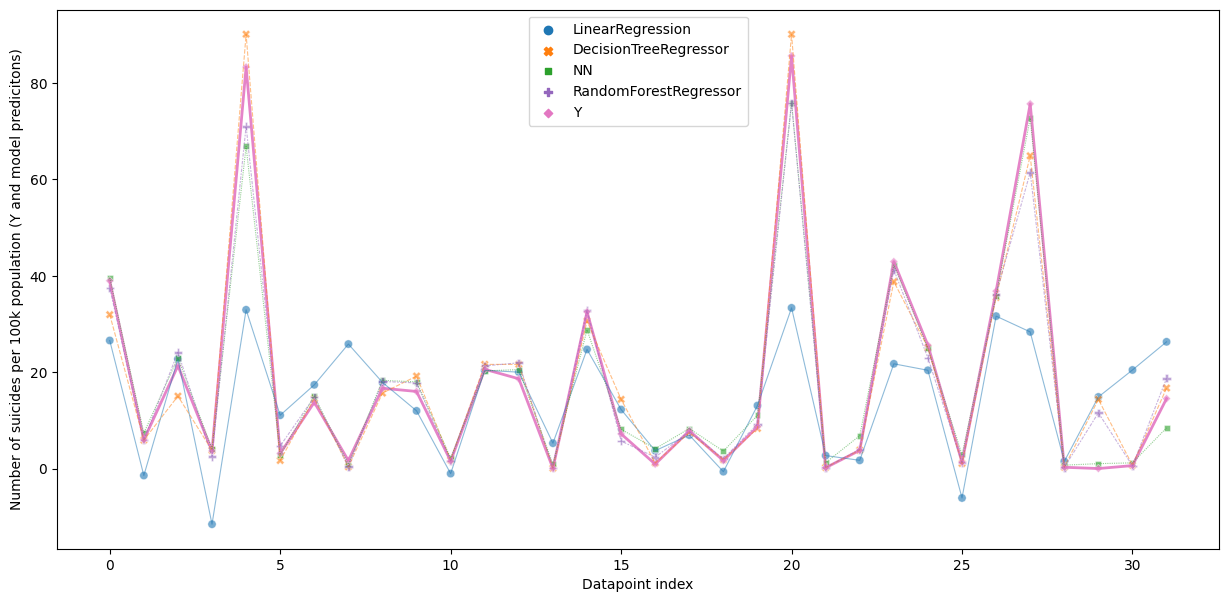

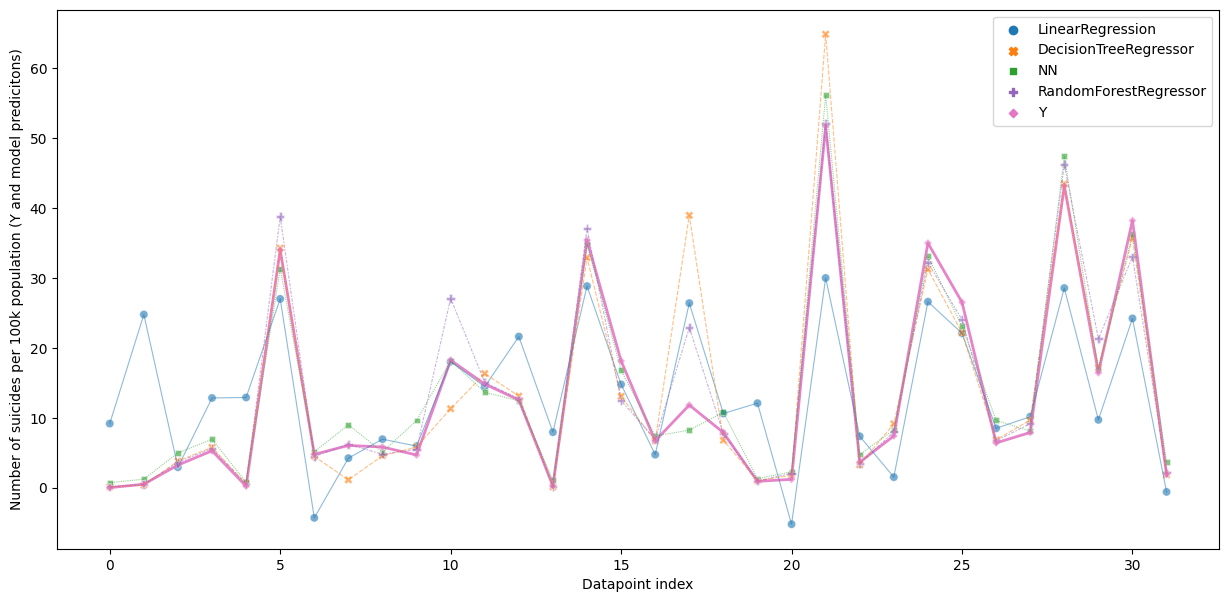

In [7]:
model_analysis.visualize_predictions(split="val",palette=ModelAnalysis.PALETTE)
model_analysis.visualize_predictions(sample_range=(100,132), split='val',palette=ModelAnalysis.PALETTE)

### Visualize the accuracies based on different metrics

TypeError: 'AxesSubplot' object is not subscriptable

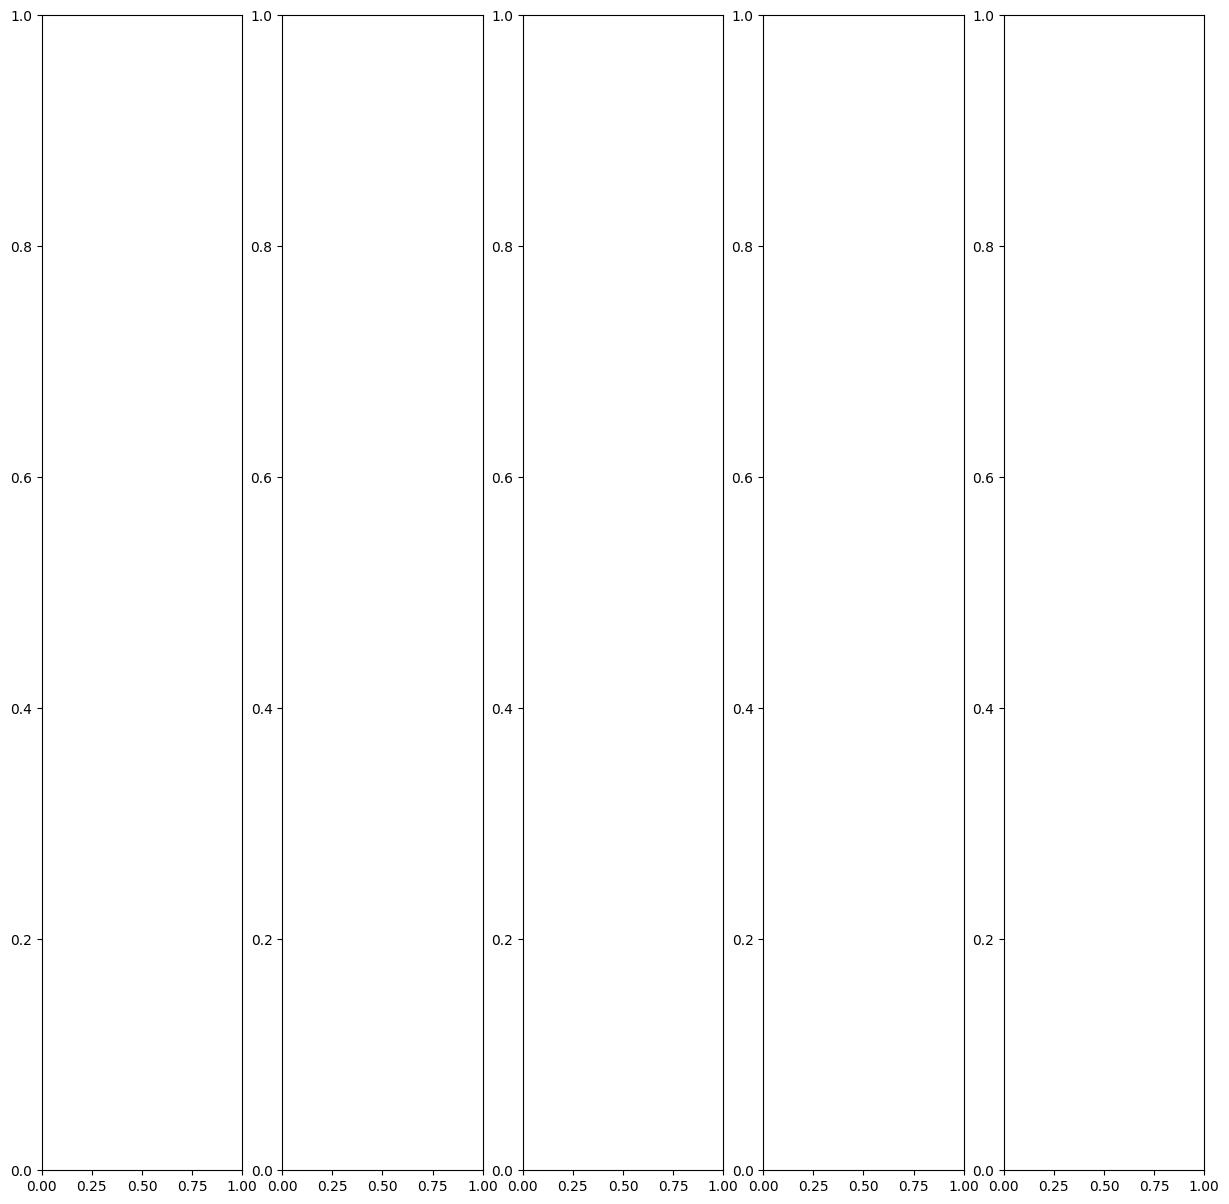

In [8]:
model_analysis.visualize_metrics(split='val',palette=ModelAnalysis.PALETTE, ncols=5)
model_analysis.visualize_metrics(split='test',palette=ModelAnalysis.PALETTE, ncols=5)

## We can save the models to a file to reuse them later without having to retrain them

In [ ]:
# model_analysis.save_models()